In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score, precision_score, roc_auc_score, roc_curve, auc
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTENC, SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.inspection import permutation_importance
import pickle 
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install eli5

In [2]:
cleaned_train_data = pd.read_csv('cleaned_train_data.csv')
cleaned_train_data.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,1.000000,0.0,3.000000,0.0,5.0,21.0,2.463052,4.274976,0.0,0.920,36.0,1.0
1,1.000000,1.0,3.000000,0.0,5.0,6.0,3.000000,5.000000,4.0,0.776,47.0,0.0
2,0.939181,1.0,0.000000,0.0,5.0,15.0,2.462749,4.129187,6.0,0.624,83.0,0.0
3,0.835441,1.0,1.318954,0.0,1.0,20.0,2.302724,5.000000,6.0,0.789,52.0,1.0
4,1.000000,0.0,3.000000,2.0,5.0,21.0,3.000000,1.000000,3.0,0.767,8.0,0.0


In [4]:
cleaned_train_data.isnull().sum()

gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
city_development_index    0
training_hours            0
target                    0
dtype: int64

In [6]:
cleaned_train_data.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

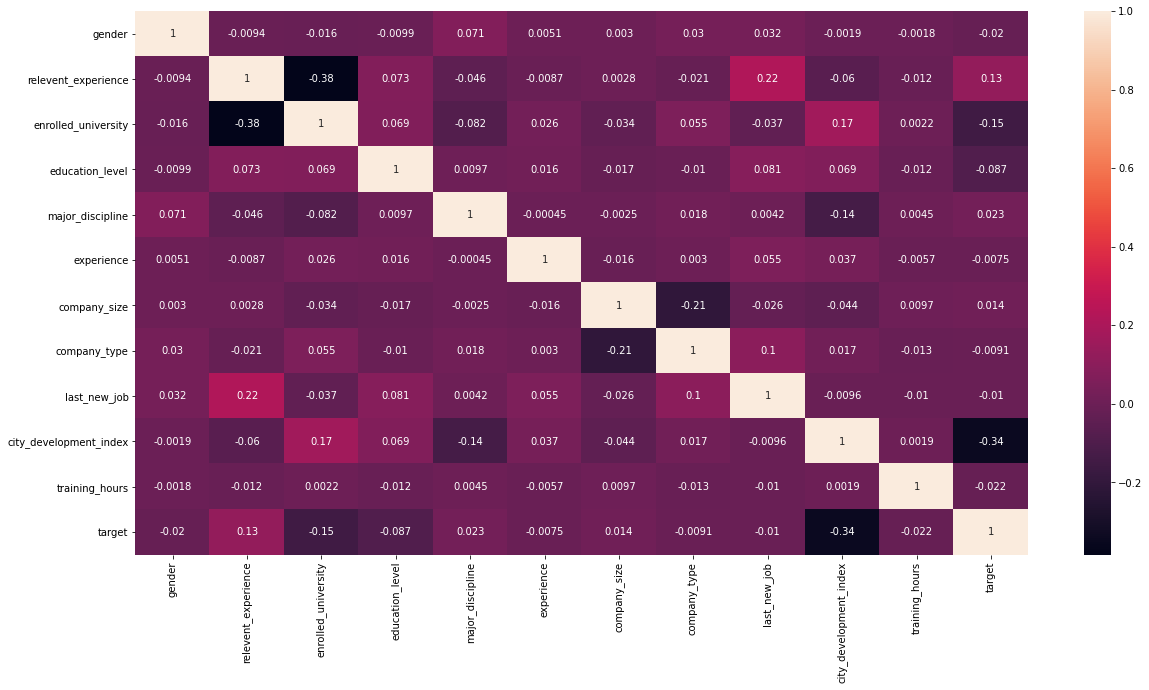

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(cleaned_train_data.corr(),annot = True)

#Dividing into X and y and standardizing the data

In [10]:
X = cleaned_train_data.drop('target',1)
y = cleaned_train_data.target

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.25, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
x_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(y_train)

x_test = pd.DataFrame(X_test)
Y_test = pd.DataFrame(y_test)

In [15]:
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

x_train.to_csv('X_train.csv', index=False)
Y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('X_test.csv', index=False)
Y_test.to_csv('y_test.csv', index=False)

#Applying SVMSmote

In [ ]:
svm_smote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X,y)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = tts(X_svm_smote,y_svm_smote, test_size=0.25, random_state=42)

sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train_svm)
X_test_svm = sc.transform(X_test_svm)

In [22]:
x_svm_smote = pd.DataFrame(X_svm_smote)
Y_svm_smote = pd.DataFrame(y_svm_smote)

x_train_svm_smote = pd.DataFrame(X_train_svm)
Y_train_svm_smote = pd.DataFrame(y_train_svm)

x_test_svm_smote = pd.DataFrame(X_test_svm)
Y_test_svm_smote = pd.DataFrame(y_test_svm)

In [24]:
x_svm_smote.to_csv('X_svm_smote.csv', index=False)
Y_svm_smote.to_csv('y_svm_smote.csv', index=False)

x_train_svm_smote.to_csv('X_train_svm_smote.csv', index=False)
Y_train_svm_smote.to_csv('y_train_svm_smote.csv', index=False)
x_test_svm_smote.to_csv('X_test_svm_smote.csv', index=False)
Y_test_svm_smote.to_csv('y_test_svm_smote.csv', index=False)

**We oversampled our minority data and we have balanced classes**

In [27]:
Y_svm_smote.value_counts()

1.0    14381
0.0    14381
dtype: int64

In [ ]:
svm_smote_applied_train_data = x_svm_smote.join(Y_svm_smote, lsuffix='left', rsuffix='right')

In [42]:
svm_smote_applied_train_data.columns = ['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'city_development_index',
       'training_hours', 'target']
svm_smote_applied_train_data

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,1.000000,0.000000,3.000000,0.000000,5.0,21.000000,2.463052,4.274976,0.0,0.920000,36.000000,1.0
1,1.000000,1.000000,3.000000,0.000000,5.0,6.000000,3.000000,5.000000,4.0,0.776000,47.000000,0.0
2,0.939181,1.000000,0.000000,0.000000,5.0,15.000000,2.462749,4.129187,6.0,0.624000,83.000000,0.0
3,0.835441,1.000000,1.318954,0.000000,1.0,20.000000,2.302724,5.000000,6.0,0.789000,52.000000,1.0
4,1.000000,0.000000,3.000000,2.000000,5.0,21.000000,3.000000,1.000000,3.0,0.767000,8.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28757,1.031211,-0.419704,0.000000,0.000000,5.0,11.000000,-1.034377,5.365614,0.0,0.499768,221.160592,1.0
28758,-0.207421,1.224085,1.224085,2.448171,5.0,19.000000,2.735530,4.141374,0.0,0.414463,99.224085,1.0
28759,0.901961,-0.318346,3.000000,0.000000,5.0,18.318346,3.170936,5.230809,0.0,0.529769,6.318346,1.0
28760,1.000000,1.000000,0.000000,0.000000,5.0,13.000000,2.385181,4.142643,6.0,0.768380,39.110619,1.0


In [43]:
svm_smote_applied_train_data.to_csv('svm_smote_applied_train_data.csv', index=False)

#Model Implementation

In [49]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('Recall Score = ',recall_score(y_test, y_pred))
    print('Precision Score = ',precision_score(y_test, y_pred))
    print('F1 score = ', f1_score(y_test,y_pred))

    return evaluate

In [50]:
def train_auc_roc_curve(model, X_test, y_test, X_train, y_train):
  base_fpr,base_tpr,base_threshold = roc_curve(y_train, model.predict(X_train))
  plt.plot([0,1])
  plt.plot(base_fpr,base_tpr)
  print("auc score :",auc(base_fpr,base_tpr))
  

  return train_auc_roc_curve

#Easy Ensemble Classifier model implimentation

###The Hyperparameters are the finalized hyperparameters using RandomizedSerchCV

In [51]:
easy_lgbm = EasyEnsembleClassifier(base_estimator= LGBMClassifier(random_state=42), n_estimators=250, n_jobs=1,
                       random_state=42, replacement=True,
                       sampling_strategy='auto', verbose=0,
                       warm_start=True)
easy_lgbm.fit(X_train_svm, y_train_svm)
evaluate(easy_lgbm, X_test_svm, y_test_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Average Error: 0.0982 degrees.
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      3603
         1.0       0.91      0.89      0.90      3588

    accuracy                           0.90      7191
   macro avg       0.90      0.90      0.90      7191
weighted avg       0.90      0.90      0.90      7191

[[3278  325]
 [ 381 3207]]
Recall Score =  0.8938127090301003
Precision Score =  0.9079841449603624
F1 score =  0.9008426966292135


<function __main__.evaluate>

In [58]:
print(classification_report(y_train_svm, easy_lgbm.predict(X_train_svm)))
print(confusion_matrix(y_train_svm, easy_lgbm.predict(X_train_svm)))
print('Recall Score = ',recall_score(y_train_svm, easy_lgbm.predict(X_train_svm)))
print('Precision Score = ',precision_score(y_train_svm, easy_lgbm.predict(X_train_svm)))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92     10778
         1.0       0.92      0.91      0.92     10793

    accuracy                           0.92     21571
   macro avg       0.92      0.92      0.92     21571
weighted avg       0.92      0.92      0.92     21571

[[9975  803]
 [ 920 9873]]
Recall Score =  0.9147595663856203
Precision Score =  0.9247845635069314


In [60]:
predict_easy_lgbm = pd.DataFrame(easy_lgbm.predict(X_test_svm))

In [62]:
print(f1_score(y_train_svm, easy_lgbm.predict(X_train_svm)))
print(f1_score(y_test_svm, easy_lgbm.predict(X_test_svm)))

predict_proba_easy_lgbm = pd.DataFrame(easy_lgbm.predict_proba(X_test_svm))

0.9197447482416508
0.9008426966292135


In [65]:
threshold = 0.5
pred = np.where(predict_easy_lgbm>threshold,'Will join the company','Will not join the company')

pred = pred.T.reshape(-1,1)
pred = pd.DataFrame(pred, columns=['Decision'])
pred

,Decision
0,Will join the company
1,Will not join the company
2,Will not join the company
3,Will join the company
4,Will join the company
...,...
7186,Will join the company
7187,Will not join the company
7188,Will not join the company
7189,Will not join the company


In [66]:
pred = pred.join(predict_proba_easy_lgbm, lsuffix='_right', rsuffix='_left')
pred = pred.rename({0 : 'Probablity of not joining', 1 : 'Probablity of joining'}, axis=1)

In [67]:
pred

,Decision,Probablity of not joining,Probablity of joining
0,Will join the company,0.015000,0.985000
1,Will not join the company,0.879918,0.120082
2,Will not join the company,0.970291,0.029709
3,Will join the company,0.158623,0.841377
4,Will join the company,0.001744,0.998256
...,...,...,...
7186,Will join the company,0.271291,0.728709
7187,Will not join the company,0.919799,0.080201
7188,Will not join the company,0.973191,0.026809
7189,Will not join the company,0.985941,0.014059


###Feature importance according to our model using eli5 library

In [71]:
eli5_permutation = PermutationImportance(estimator = easy_lgbm, scoring = 'f1', random_state=42, n_iter = 5)
eli5_permutation.fit(X_test_svm, y_test_svm)

PermutationImportance(cv='prefit',
                      estimator=EasyEnsembleClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                     class_weight=None,
                                                                                     colsample_bytree=1.0,
                                                                                     importance_type='split',
                                                                                     learning_rate=0.1,
                                                                                     max_depth=-1,
                                                                                     min_child_samples=20,
                                                                                     min_child_weight=0.001,
                                                                                     min_split_gain=0.0,
             

In [72]:
eli5_permutation.feature_importances_.T.reshape(-1,1)

array([[0.1176428 ],
       [0.02070139],
       [0.0021507 ],
       [0.01538549],
       [0.01722066],
       [0.00323402],
       [0.02164259],
       [0.02498306],
       [0.01068839],
       [0.08096719],
       [0.00180245]])

This shows the lowest and highest importance of every feature

In [73]:
eli5.show_weights(eli5_permutation, feature_names = X.columns.to_list())

Weight,Feature
0.1176 ± 0.0097,gender
0.0810 ± 0.0052,city_development_index
0.0250 ± 0.0028,company_type
0.0216 ± 0.0045,company_size
0.0207 ± 0.0027,relevent_experience
0.0172 ± 0.0032,major_discipline
0.0154 ± 0.0019,education_level
0.0107 ± 0.0045,last_new_job
0.0032 ± 0.0048,experience
0.0022 ± 0.0026,enrolled_university


In [74]:
feature_importance_with_eli5=pd.DataFrame(np.hstack((np.array([X.columns[0:]]).T, eli5_permutation.feature_importances_.T.reshape(-1,1))), columns=['feature', 'importance'])
feature_importance_with_eli5['importance']=pd.to_numeric(feature_importance_with_eli5['importance'])
feature_importance_with_eli5.sort_values(by='importance', ascending=False)

,feature,importance
0,gender,0.117643
9,city_development_index,0.080967
7,company_type,0.024983
6,company_size,0.021643
1,relevent_experience,0.020701
4,major_discipline,0.017221
3,education_level,0.015385
8,last_new_job,0.010688
5,experience,0.003234
2,enrolled_university,0.002151


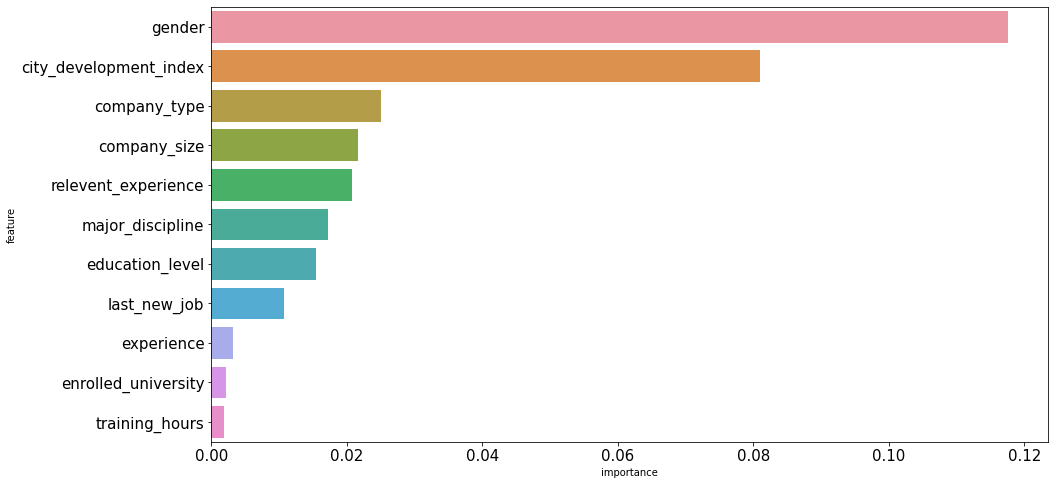

In [78]:
fig = plt.figure(figsize = (15,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x = 'importance', y = 'feature', data = feature_importance_with_eli5, 
            order = feature_importance_with_eli5.sort_values('importance', ascending=False).feature) 

In [57]:
pickle.dump(easy_lgbm, open('EasyEnsembleClassifier_with_LGBMClassifier_as_base_estimator.pkl', 'wb'))

In [79]:
fig.savefig('feature importance.jpg', bbox_inches='tight', dpi=150)